In [63]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import alphashape
from geonetworkx.tools import get_alpha_shape_polygon
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely.ops import unary_union

In [12]:
source_ = [45.503032, -73.566424]
distance = 1000
alpha = 85

In [4]:
# Build the graph
graph = ox.graph_from_point(source_, network_type='walk', dist=distance + 250)
nodes, edges = ox.utils_graph.graph_to_gdfs(graph)

# Get UTM crs for distance based geoprocessing
utm_crs = nodes.estimate_utm_crs()

# Construct GeoDataFrames
source = gpd.GeoDataFrame(geometry=[Point(source_[::-1])], crs='epsg:4326')
buffer = source.to_crs(utm_crs).buffer(distance).to_crs('epsg:4326')

# Clip
nodes = nodes.clip(buffer)
edges = edges.clip(buffer)

In [5]:
# Find the closest node to source_
start_node = ox.nearest_nodes(graph, source_[1], source_[0])

# Get start node as gdf for plotting
start_point = nodes[nodes.index == start_node].copy()

In [15]:
# Calculate isochrone
subgraph = nx.ego_graph(graph, start_node, radius=distance, distance='length')
acc_nodes, acc_edges = ox.utils_graph.graph_to_gdfs(subgraph)

# Convex/Concave/Offset
acc_shape_convex = gpd.GeoDataFrame(geometry=[acc_nodes.unary_union.convex_hull], crs='epsg:4326')

# Concave shape
pts = list(acc_nodes.to_crs(utm_crs).geometry.apply(lambda p: (p.x, p.y)))
shape_concave = get_alpha_shape_polygon(pts, alpha)

C:\Users\arthu\AppData\Local\Temp\ipykernel_26224\4248027092.py:10: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  shape_concave = get_alpha_shape_polygon(pts, alpha)
C:\Users\arthu\miniconda3\envs\mybase\lib\site-packages\geonetworkx\tools\isochrones.py:169: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union(filtered_polygons)


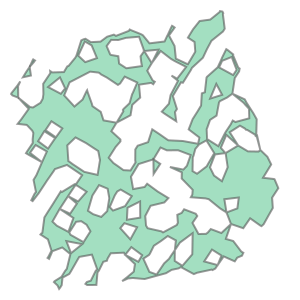

In [16]:
shape_concave

In [17]:
type(shape_concave)

shapely.geometry.multipolygon.MultiPolygon

In [24]:
if shape_concave.geom_type.lower() == 'mulitpolygon':
    
    shape_concave.geom_count

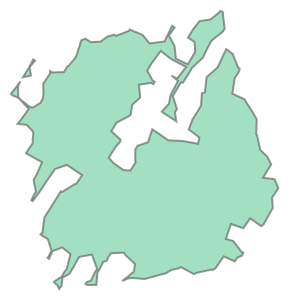

In [71]:
p = MultiPolygon([Polygon(p.exterior) for p in shape_concave.geoms]).buffer(0)
p

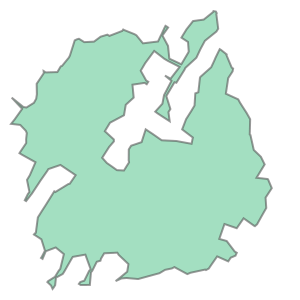

In [57]:
Polygon(p.exterior)

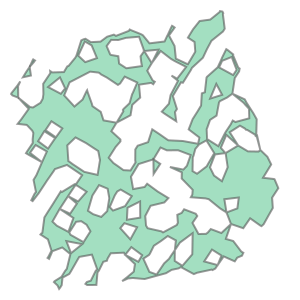

In [49]:
shape_concave

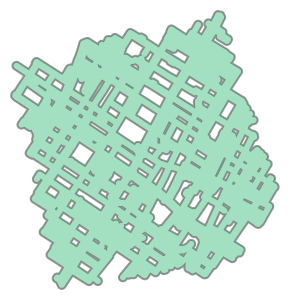

In [81]:
acc_edges.to_crs(utm_crs).buffer(25, cap_style='round').unary_union

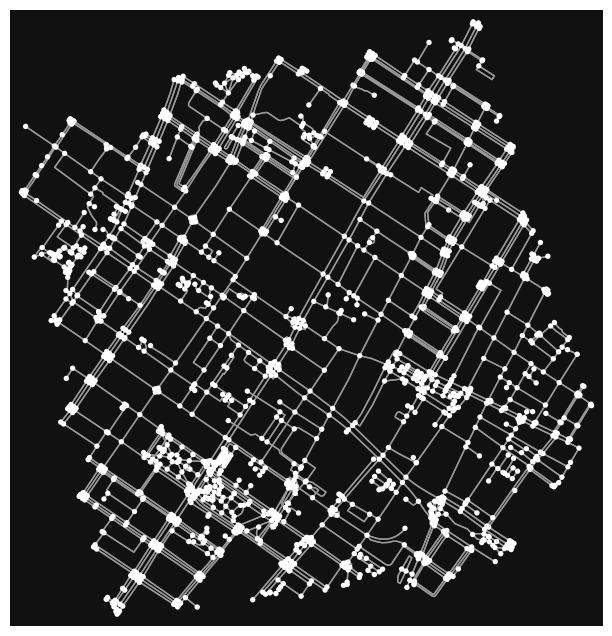

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
ox.plot_graph(subgraph)

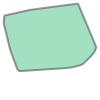

In [10]:
acc_nodes.unary_union.convex_hull

In [98]:
pts = list(acc_nodes.to_crs(utm_crs).geometry.apply(lambda p: (p.x, p.y)))

In [101]:
alphashape.circumradius(pts)

8859.214296296954

C:\Users\arthu\AppData\Local\Temp\ipykernel_23156\1417119341.py:1: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  get_alpha_shape_polygon(pts, 50)
C:\Users\arthu\miniconda3\envs\mybase\lib\site-packages\geonetworkx\tools\isochrones.py:169: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union(filtered_polygons)


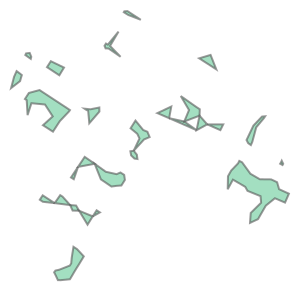

In [108]:
get_alpha_shape_polygon(pts, 50)

In [102]:
alphashape.circumcenter(pts)

array([ 2.37906254e+09, -1.82277174e+09, -1.16114135e+09, -2.76923287e+09,
        8.81123869e+08, -8.09478155e+07,  3.45174580e+08,  1.81183253e+09,
       -3.58858587e+08, -5.05021651e+08, -2.07703690e+09,  1.52867849e+09,
       -8.72847565e+08,  2.82813227e+09, -5.55189665e+08, -3.25391749e+08,
        1.01330331e+09, -7.06809472e+07, -6.03088048e+08,  1.12617144e+09,
       -1.98791083e+09,  1.14311565e+09,  7.25096095e+08, -9.36478351e+08,
       -6.01037441e+08, -7.69482361e+07,  3.92801148e+08,  5.09859031e+08,
        1.46133568e+08, -8.51867394e+08,  1.57489986e+09, -1.93324962e+09,
        7.79719307e+08, -2.09282466e+07,  6.31854054e+08, -9.90161536e+08,
        1.03166650e+08, -8.07017623e+08,  4.78930054e+08,  1.33305544e+09,
       -8.38038422e+07, -7.57601972e+08, -5.24432507e+07, -5.86885795e+08,
       -4.76532473e+08, -4.17188396e+08, -2.45257171e+07, -1.12521767e+09,
       -1.29670527e+08,  1.54998580e+09,  5.39122909e+08, -4.09689587e+07,
       -4.17474789e+08,  

In [103]:
alphashape.optimizealpha(pts)

TypeError: 'MultiPoint' object is not iterable

In [99]:
alphashape.alphashape(pts)

TypeError: 'MultiPoint' object is not iterable

In [11]:
acc_shape_convex = gpd.GeoDataFrame(geometry=[acc_nodes.unary_union.convex_hull], crs='epsg:4326')
acc_shape_convex.explore()

In [11]:
nodes[nodes.index == start_node]

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
29794281,45.503035,-73.56634,4,NaN,NaN,POINT (-73.56634 45.50304)


In [6]:
edges

,,,osmid,oneway,name,highway,maxspeed,width,reversed,length,lanes,geometry,tunnel,service,access,ref,bridge
u,v,key,,,,,,,,,,,,,,,
208756273,208756278,0,19896812,False,Rue Belmont,service,NaN,NaN,False,171.374,NaN,"LINESTRING (-73.56658 45.50079, -73.56658 45.5...",NaN,alley,permissive,NaN,NaN
208756278,208756273,0,19896812,False,Rue Belmont,service,NaN,NaN,True,171.374,NaN,"LINESTRING (-73.56658 45.50079, -73.56658 45.5...",NaN,alley,permissive,NaN,NaN
32125079,32125080,0,455083986,False,Boulevard Robert-Bourassa,secondary,50,NaN,False,85.417,4,"LINESTRING (-73.56622 45.50115, -73.56608 45.5...",NaN,NaN,NaN,NaN,NaN
32125170,32125171,0,479572754,False,Boulevard Robert-Bourassa,secondary,50,NaN,False,80.821,4,"LINESTRING (-73.56528 45.50093, -73.56602 45.5...",NaN,NaN,NaN,NaN,NaN
32125171,32125170,0,479572754,False,Boulevard Robert-Bourassa,secondary,50,NaN,True,80.821,4,"LINESTRING (-73.56602 45.50133, -73.56528 45.5...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281789721,10054383451,0,"[546096657, 455083973]",False,Boulevard René-Lévesque Ouest,secondary,50,NaN,True,61.683,3,"LINESTRING (-73.56589 45.50362, -73.56625 45.5...",NaN,NaN,NaN,NaN,NaN
29796360,10054383453,0,"[455083978, 546096658]",False,Boulevard René-Lévesque Ouest,secondary,50,NaN,False,143.933,3,"LINESTRING (-73.56555 45.50432, -73.56636 45.5...",NaN,NaN,NaN,NaN,NaN
10054383453,29796360,0,"[455083978, 546096658]",False,Boulevard René-Lévesque Ouest,secondary,50,NaN,True,143.933,3,"LINESTRING (-73.56643 45.50318, -73.56636 45.5...",NaN,NaN,NaN,NaN,NaN


In [16]:
graph.edges.data()

OutMultiEdgeDataView([(26233235, 10054364910, {'osmid': 13501273, 'oneway': False, 'name': 'Rue Aylmer', 'highway': 'residential', 'maxspeed': '30', 'width': '8.7', 'reversed': False, 'length': 12.751}), (26235235, 9738612358, {'osmid': 4320454, 'oneway': False, 'name': 'Rue Sainte-Catherine Ouest', 'highway': 'tertiary', 'maxspeed': '40', 'reversed': False, 'length': 6.937}), (26235235, 9738612357, {'osmid': 356391517, 'oneway': False, 'lanes': '2', 'name': 'Rue De Bleury', 'highway': 'tertiary', 'maxspeed': '40', 'reversed': False, 'length': 7.863}), (26235235, 9738612360, {'osmid': 455083992, 'oneway': False, 'lanes': '2', 'name': 'Rue De Bleury', 'highway': 'tertiary', 'maxspeed': '40', 'reversed': True, 'length': 7.64}), (26235235, 9738612359, {'osmid': 1059975990, 'oneway': False, 'lanes': '2', 'name': 'Rue Sainte-Catherine Ouest', 'highway': 'tertiary', 'maxspeed': '40', 'reversed': True, 'length': 8.398}), (26235236, 208756329, {'osmid': 329384213, 'oneway': False, 'lanes': '2'

In [12]:
! pip install alphashape

     -------------------------------------- 681.1/681.1 kB 8.6 MB/s eta 0:00:00
     ------------------------------------- 433.3/433.3 kB 13.6 MB/s eta 0:00:00
